<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [2]:
import tensorflow as tf

## Creating new data to view it

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

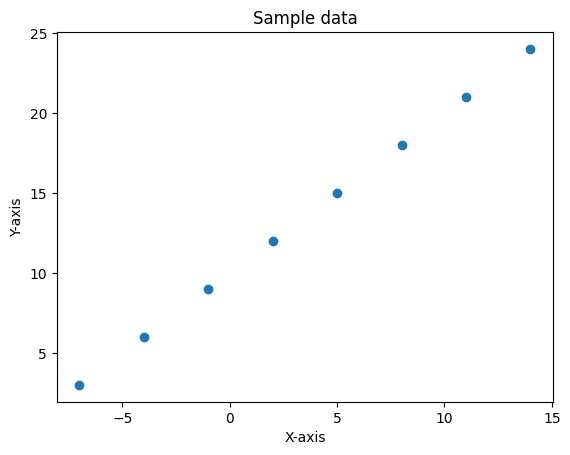

In [4]:
plt.scatter(X,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample data")
plt.show()

In [5]:
y == X + 10 # from this we can tell that the equation of the line would be y = X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# our input and output shapes are going to be 1
X[0].shape, y[0].shape # its showing nothing cause when we are accesing 1 value from an array it returns a scalar.

((), ())

In [7]:
X[0].ndim # this shows that it is a scalar

0

In [8]:
# turning the numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in creating a model in tensorflow
1. **Creating the model** - defining the input, output layers and alos the hidden layers.
2. **Compiling the model** - defining the loss function that will correct out model, choosing the optimzer that tells our model how to improve the patterns it is learning and evaluation metrics thats tells us the performance of our model.
3. **Fitting the model** - Letting the model find patterns in X and y which are our features and labels.

In [9]:
X.ndim, tf.expand_dims(X, axis=-1).ndim

(1, 2)

In [10]:
x_new = tf.expand_dims(X, axis=-1)
x_new[1,0]

<tf.Tensor: shape=(), dtype=float64, numpy=-4.0>

In [11]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model.fit(X,y,epochs=5) # since i have provided the input size i do not need to change the tensor to 2 dimensions

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step - loss: 12.2133 - mae: 12.2133
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - loss: 12.0808 - mae: 12.0808
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.9483 - mae: 11.9483
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.8158 - mae: 11.8158
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.6833 - mae: 11.6833


In [12]:
# predicting using a sample value
chumma = tf.constant([[17.0]]) # make sure the input is always a tensor
model.predict(chumma) # this is when the epochs is 5, has a MAE of 7.4738

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[9.274482]], dtype=float32)

# Improving the Model
Places to improve the model -
1. **Creating a model**- in this step in order to improve our model we may increase the **number of hidden layers**, we may **increase the number of neurons per layer** or change our **activation function** (in this case its linear by default).
2.**Compiling the model** - here we might the change the optmization function or the **learning rate**.
3. **Fitting a model** - here we might increase the number of **epochs** or give the model more **data**.

## Improving the model only by increasing the epoch number

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model_epoch = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_epoch.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model_epoch.fit(tf.expand_dims(X, axis=-1),y,epochs=100) # Since i have not provided the input shape,
# i will have to convert my 1 dimensional tensor to 2 dimensions

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - loss: 16.8839 - mae: 16.8839
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 16.6026 - mae: 16.6026
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 16.3214 - mae: 16.3214
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 16.0401 - mae: 16.0401
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15.7589 - mae: 15.7589
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 15.4776 - mae: 15.4776
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 15.1964 - mae: 15.1964
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 14.9172 - mae: 14.9172
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 14.7847 - mae: 14.7847
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 14.6522 - mae: 14.6522
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 14.5197 - mae: 14.5197
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 14.3872 - mae: 14.3872
Epoch 13/100
1/1 ━━━━━━━

In [14]:
chumma = tf.constant([[17.0]])
model_epoch.predict(chumma) # this is when the epochs was 100, has a MAE of 6.8306

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[29.461681]], dtype=float32)

## Improving with another hidden layer

In [15]:
model_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_layer.compile(loss = tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["mae"])

model_layer.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - loss: 13.2925 - mae: 13.2925
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.7789 - mae: 12.7789
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.2726 - mae: 12.2726
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.7574 - mae: 11.7574
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.2236 - mae: 11.2236
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.6763 - mae: 10.6763
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.1052 - mae: 10.1052
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.5068 - mae: 9.5068
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.8849 - mae: 8.8849
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.2282 - mae: 8.2282
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.5419 - mae: 7.5419
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.8040 - mae: 6.8040
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [16]:
model_layer.predict(tf.constant([17.0])) # we can see how much our MAE has improved from when we had only 1 layer.
# Even though the MAE is better, the prediction is worse than the previous one.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


array([[32.066452]], dtype=float32)

So, what might be happening in the above case where the training metric has improved but the prediction has worsened is that by increasing the number of layers or increasing the neurons per layer we are over fitting the data and that may cause the prediction value to be worse than before.

Note - The learning rate is the most important hyperparameter that we can change to improve our model.

# Evaluating models

In [17]:
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [18]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Visualizing the data

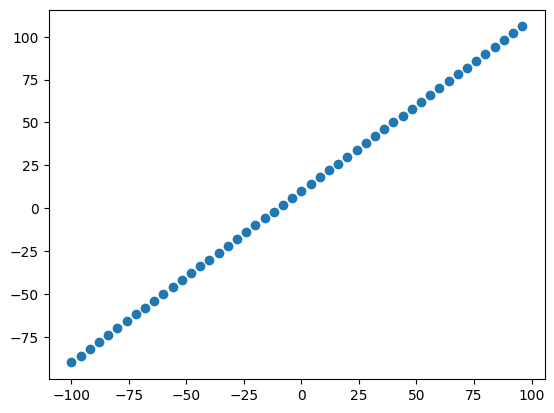

In [19]:
plt.scatter(X,y)

In [20]:
# Splitting the dataset
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

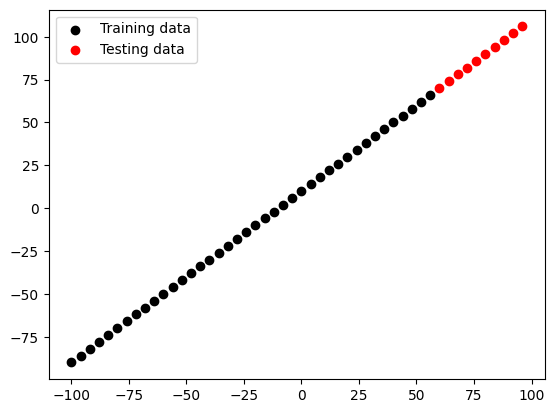

In [21]:
### Vizualizing the training data
plt.scatter(X_train,y_train,c="black",label="Training data")

### Vizualizing the testing data
plt.scatter(X_test,y_test,c="r",label="Testing data")

plt.legend()
plt.show()

In [22]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

## Vizualizing the model

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** = total number of parameters in the model.
* **Trainable params** = total number of parameters that the model can update as it trains.
* **Non-trainable params** = these are the parameters that the model cant update as these are from an imported model which is already trained. imported models are mostly used during **transfer learning**.

In [24]:
# 3. Fitting the model
model.fit(X_train,y_train,epochs=100,verbose=0)

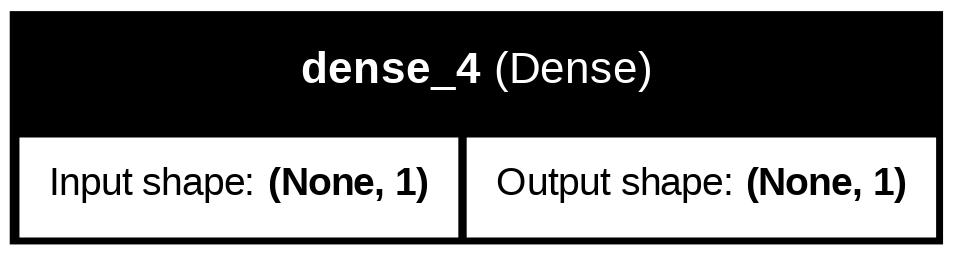

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True,show_layer_names = True)

## Visulaizing the model Predictions

In [26]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[55.634266],
       [59.24959 ],
       [62.864918],
       [66.48024 ],
       [70.095566],
       [73.71089 ],
       [77.32622 ],
       [80.94154 ],
       [84.55687 ],
       [88.172195]], dtype=float32)

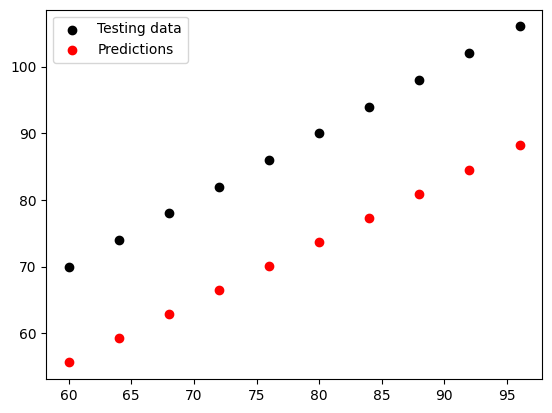

In [27]:
plt.scatter(X_test,y_test,c="black",label="Testing data")
plt.scatter(X_test,y_pred,c="r",label="Predictions")
plt.legend()
plt.show()

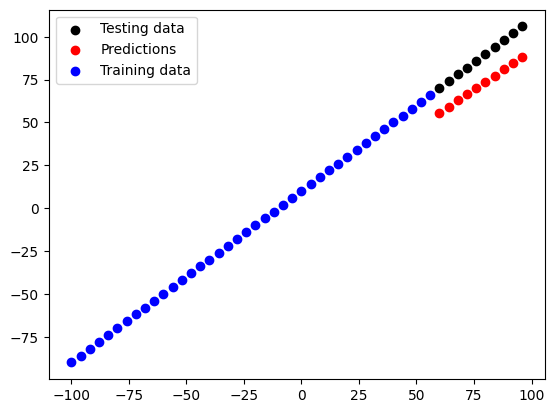

In [28]:
plt.scatter(X_test,y_test,c="black",label="Testing data")
plt.scatter(X_test,y_pred,c="r",label="Predictions")
plt.scatter(X_train,y_train,c="blue",label="Training data")
plt.legend()
plt.show() # shitty ass model

## Evaluations metrics

### MAE

In [29]:
y_test.shape, y_pred.shape

((10,), (10, 1))

In [30]:
mae = tf.keras.losses.MeanAbsoluteError()

In [31]:
mae_value = mae.call(y_test,y_pred)
mae_value

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.365734, 14.750408, 15.135082, 15.51976 , 15.904434, 16.289108,
       16.673782, 17.058456, 17.44313 , 17.827805], dtype=float32)>

In [32]:
# changing the shape to get 1 value
y_pred = tf.squeeze(y_pred)

In [33]:
mae_value = mae(y_test,y_pred)
mae_value

<tf.Tensor: shape=(), dtype=float32, numpy=16.096769332885742>

### MSE

In [34]:
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_test,y_pred)
mse_value

<tf.Tensor: shape=(), dtype=float32, numpy=260.3268127441406>

## Running experiments to improve our model

### Simple model with one layer and 100 epochs

In [35]:
X,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [36]:
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fitting the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 56.0256 - mae: 56.0256
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 21.7353 - mae: 21.7353
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.3453 - mae: 10.3453
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.1465 - mae: 12.1465
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.5798 - mae: 12.5798
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.0394 - mae: 8.0394
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.7478 - mae: 9.7478
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.0216 - mae: 8.0216
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.7362 - mae: 9.7362
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.0037 - mae: 8.0037
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.7246 - mae: 9.7246
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.9859 - mae: 7.9859
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 

In [37]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[ 69.19932 ],
       [ 73.71977 ],
       [ 78.24023 ],
       [ 82.76068 ],
       [ 87.281136],
       [ 91.80159 ],
       [ 96.322044],
       [100.8425  ],
       [105.36295 ],
       [109.88341 ]], dtype=float32)

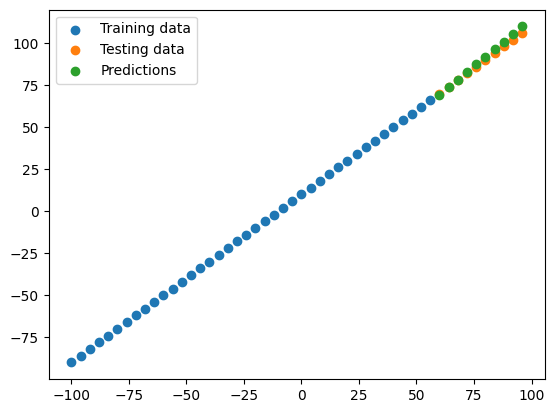

In [38]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_1,label="Predictions")
plt.legend()
plt.show()

In [39]:
mae_val_1 = mae(y_test,tf.squeeze(y_pred_1))
mae_val_1

<tf.Tensor: shape=(), dtype=float32, numpy=1.757544755935669>

In [40]:
mse_val_1 = mse(y_test,tf.squeeze(y_pred_1))
mse_val_1

<tf.Tensor: shape=(), dtype=float32, numpy=4.610499382019043>

### model with 2 layers and 100 epochs

In [41]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
# 3. fitting the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 31.8885 - mae: 31.8885
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 27.7825 - mae: 27.7825
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 16.3720 - mae: 16.3720
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 19.2247 - mae: 19.2247 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.9124 - mae: 12.9124
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 18.3057 - mae: 18.3057
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.6092 - mae: 13.6092
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 15.0072 - mae: 15.0072
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.9542 - mae: 10.9542
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.7580 - mae: 14.7580 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.8590 - mae: 10.8590
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.6654 - mae: 14.6654
Epoch 13/100
2/2 ━━━━━

In [42]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[42.628426],
       [45.360527],
       [48.092625],
       [50.824738],
       [53.55683 ],
       [56.288944],
       [59.021046],
       [61.753143],
       [64.485245],
       [67.21734 ]], dtype=float32)

In [43]:
mae_val_2 = mae(y_test,tf.squeeze(y_pred_2))
mse_val_2 = mse(y_test,tf.squeeze(y_pred_2))
mae_val_2,mse_val_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.07711410522461>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1107.3577880859375>)

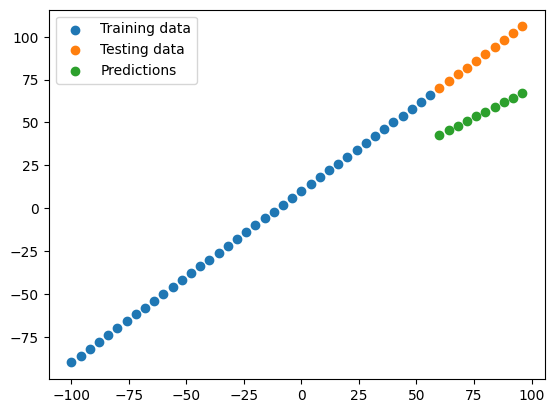

In [44]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_2,label="Predictions")
plt.legend()
plt.show()

### TW0 layers trained for 500 epochs

In [45]:
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 45.1678 - mae: 45.1678
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 23.9897 - mae: 23.9897 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 23.4456 - mae: 23.4456
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.8051 - mae: 14.8051
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.9843 - mae: 18.9843
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.2742 - mae: 13.2742
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.2283 - mae: 15.2283
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.9593 - mae: 15.9593
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.9416 - mae: 11.9416
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.9195 - mae: 14.9195
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.9761 - mae: 10.9761
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.8034 - mae: 14.8034
Epoch 13/500
2/2 ━━━━━━

In [46]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([[ 70.33371 ],
       [ 74.536705],
       [ 78.73969 ],
       [ 82.94267 ],
       [ 87.14565 ],
       [ 91.34865 ],
       [ 95.55162 ],
       [ 99.75462 ],
       [103.95761 ],
       [108.1606  ]], dtype=float32)

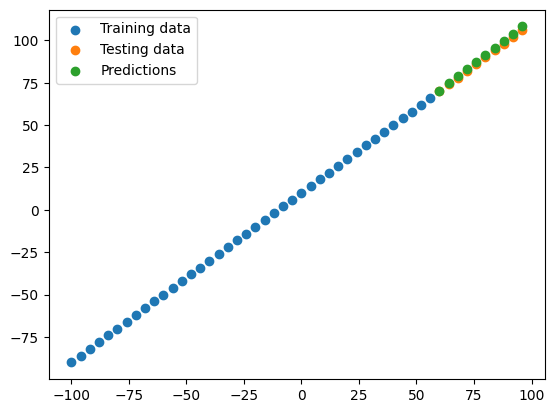

In [47]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_3,label="Predictions")
plt.legend()
plt.show()

In [48]:
mae_val_3 = mae(y_test,y_pred_3)
mse_val_3 = mse(y_test,y_pred_3)
mae_val_3,mse_val_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2471535205841064>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.8953220844268799>)

## Comparing the results of our models

In [49]:
import pandas as pd

In [50]:
data = [["model_1",mae_val_1.numpy(),mse_val_1.numpy()],
 ["model_2",mae_val_2.numpy(),mse_val_2.numpy()],["model_3",mae_val_3.numpy(),mse_val_3.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE","MSE"])
df

,Model,MAE,MSE
0,model_1,1.757545,4.610499
1,model_2,33.077114,1107.357788
2,model_3,1.247154,1.895322


In [51]:
# Looks like model 1 is the best performing model in this scenario
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Saving out models
* Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

* You can save a TensorFlow/Keras model using model.save().

* There are two ways to save a model in TensorFlow:
    1. The SavedModel format (default).
    2. The HDF5 format.

Usind the HDF5 format stores the data in a universal format

In [52]:
# Using the HDF5 standard
model_3.save("model_3_demo.h5")

## Loading the Model

In [53]:
loaded_model_3 = tf.keras.models.load_model("/content/model_3_demo.h5")
loaded_model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Compare model_1 predictions with loaded model_1 predictions

In [54]:
model_3_preds = model_3.predict(X_test)
loaded_model_3_preds = loaded_model_3.predict(X_test)
model_3_preds == loaded_model_3_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [55]:
model_3_mae = mae(model_3_preds,y_test)
loaded_model_3_mae = mae(loaded_model_3_preds,y_test)
model_3_mae,loaded_model_3_mae

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2471535205841064>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.2471535205841064>)

## Larger Model

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df_new = pd.get_dummies(df,dtype="int64")
df_new.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [58]:
df_new['charges'].mean()

13270.422265141257

In [59]:
X = df_new.drop("charges",axis=1).values
y = df_new["charges"].values

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [62]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
model_real.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 13276.1631 - mae: 13276.1631
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13262.0166 - mae: 13262.0166
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13246.4629 - mae: 13246.4629
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13228.8643 - mae: 13228.8643
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13208.6934 - mae: 13208.6934
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13185.6230 - mae: 13185.6230
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13159.3857 - mae: 13159.3857
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13129.7256 - mae: 13129.7256
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13096.4346 - mae: 13096.4346
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13059.3721 - mae: 13059.3721
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13018.4492 - mae: 13018.4492
Epoch 12/100
34/34 ━━━━━━━━━━

In [63]:
model_real.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

In [64]:
model_real_pred = model_real.predict(X_test)
model_real_mae = mae(y_test,model_real_pred)
model_real_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=7534.92626953125>

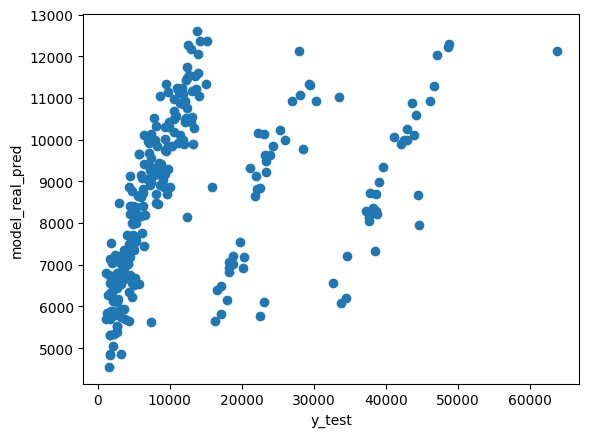

In [65]:
plt.scatter(y_test,model_real_pred)
plt.xlabel("y_test")
plt.ylabel("model_real_pred")
plt.show()

## Improving the model

### Increasing the number of epochs to 500

In [66]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real_500 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real_500.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
model_real_500.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 13283.6582 - mae: 13283.6582
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13267.7441 - mae: 13267.7441
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13250.9717 - mae: 13250.9717
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13232.8281 - mae: 13232.8281
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13212.7666 - mae: 13212.7666
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13190.3252 - mae: 13190.3252
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13165.0654 - mae: 13165.0654
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13136.5205 - mae: 13136.5205
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13104.3008 - mae: 13104.3008
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13068.1611 - mae: 13068.1611
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13027.9482 - mae: 13027.9482
Epoch 12/500
34/34 ━━━━━━━━━━

In [67]:
model_real_500_pred = model_real_500.predict(X_test)
model_real_500_mae = mae(y_test,model_real_500_pred)
model_real_500_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=6228.71435546875>

In [68]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df

,Model,MAE
0,model_real,7534.926270
1,model_real_500,6228.714355


### 2, 10 NEURON Layers with 500 epochs




In [69]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real_layer2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real_layer2.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
model_real_layer2.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 13300.3125 - mae: 13300.3125
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13268.2168 - mae: 13268.2168
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13231.6631 - mae: 13231.6631
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13181.2500 - mae: 13181.2500
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13106.4062 - mae: 13106.4062
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12992.8457 - mae: 12992.8457
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12822.1748 - mae: 12822.1748
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12573.3975 - mae: 12573.3975
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12225.0977 - mae: 12225.0977
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11759.7539 - mae: 11759.7539
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11173.4434 - mae: 11173.4434
Epoch 12/500
34/34 ━━━━━━━━━━

In [70]:
model_real_layer2_pred = model_real_layer2.predict(X_test)
model_real_layer2_mae = mae(y_test,model_real_layer2_pred)
model_real_layer2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3325.105712890625>

In [71]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()],["model_real_layer2",model_real_layer2_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df

,Model,MAE
0,model_real,7534.926270
1,model_real_500,6228.714355
2,model_real_layer2,3325.105713


### Running the same model as above but with a TPU

### 3, 10 NEURON Layers with 500 epochs


In [72]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real_layer3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real_layer3.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
model_real_layer3.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 13292.8301 - mae: 13292.8301
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13240.6611 - mae: 13240.6611
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13138.7275 - mae: 13138.7275
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12912.5010 - mae: 12912.5010
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12422.8271 - mae: 12422.8271
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11479.8096 - mae: 11479.8096
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10024.3770 - mae: 10024.3770
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8423.8916 - mae: 8423.8916
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7578.5562 - mae: 7578.5562
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7493.4863 - mae: 7493.4863
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7472.2002 - mae: 7472.2002
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━

In [73]:
model_real_layer3_pred = model_real_layer3.predict(X_test)
model_real_layer3_mae = mae(y_test,model_real_layer3_pred)
model_real_layer3_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3163.3876953125>

In [74]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()],["model_real_layer2",model_real_layer2_mae.numpy()]
        ,["model_real_layer3",model_real_layer3_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df

,Model,MAE
0,model_real,7534.926270
1,model_real_500,6228.714355
2,model_real_layer2,3325.105713
3,model_real_layer3,3163.387695


### 3 Layers, 100 neurons and 500 epochs

In [75]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_real_layer_100 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_real_layer_100.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
history = model_real_layer_100.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 13289.8857 - mae: 13289.8857
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13174.7100 - mae: 13174.7100
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12934.3115 - mae: 12934.3115
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12423.1357 - mae: 12423.1357
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11482.5166 - mae: 11482.5166
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10097.1211 - mae: 10097.1211
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8609.1035 - mae: 8609.1035
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7614.2681 - mae: 7614.2681
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7395.0640 - mae: 7395.0640
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7361.0532 - mae: 7361.0532
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7339.5615 - mae: 7339.5615
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━

In [76]:
model_real_layer_100_pred = model_real_layer_100.predict(X_test)
model_real_layer_100_mae = mae(y_test,model_real_layer_100_pred)
model_real_layer_100_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3162.380859375>

In [77]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()],["model_real_layer2",model_real_layer2_mae.numpy()]
        ,["model_real_layer3",model_real_layer3_mae.numpy()],["model_real_layer_100",model_real_layer_100_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df

,Model,MAE
0,model_real,7534.926270
1,model_real_500,6228.714355
2,model_real_layer2,3325.105713
3,model_real_layer3,3163.387695
4,model_real_layer_100,3162.380859


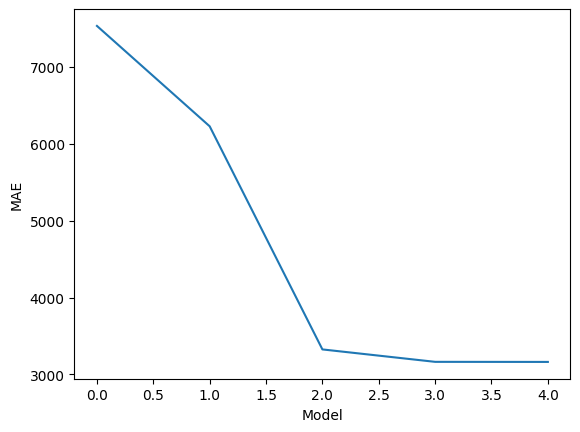

In [78]:
# line plot of mae
plt.plot(df["MAE"])
plt.xlabel("Model")
plt.ylabel("MAE")
plt.show()

Text(0.5, 1.0, 'Loss after epoch')

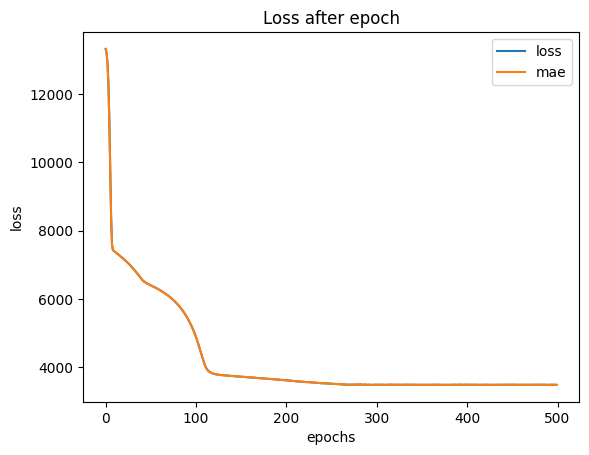

In [79]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

* Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving.

## Pre-Processing Data (Normalization and Standardization)

In [81]:
X_train[0]

<tf.Tensor: shape=(11,), dtype=float64, numpy=
array([46.  , 19.95,  2.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ])>

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [87]:
ct = make_column_transformer((MinMaxScaler(),['age','bmi','children']),(OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region']))

In [92]:
X = df.drop("charges",axis=1)
y = df["charges"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
# Fit the column transformer to the training data
ct.fit(X_train)

# Transforming the Training data and the Testing data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [97]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_norm.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# 3. Fit the model
history = model_norm.fit(X_train_normal,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 13297.4434 - mae: 13297.4434
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13290.8652 - mae: 13290.8652
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13275.3037 - mae: 13275.3037
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13241.4688 - mae: 13241.4688
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13178.5342 - mae: 13178.5342
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13075.0410 - mae: 13075.0410
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12919.7461 - mae: 12919.7461
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12702.2080 - mae: 12702.2080
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12412.4336 - mae: 12412.4336
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12041.3691 - mae: 12041.3691
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11594.4639 - mae: 11594.4639
Epoch 12/500
34/34 ━━━━━━━━━━

In [98]:
model_norm_pred = model_norm.predict(X_test_normal)
model_norm_mae = mae(y_test,model_norm_pred)
model_norm_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3159.65771484375>

In [101]:
data = [["model_real",model_real_mae .numpy()],
 ["model_real_500",model_real_500_mae.numpy()],["model_real_layer2",model_real_layer2_mae.numpy()]
        ,["model_real_layer3",model_real_layer3_mae.numpy()],["model_real_layer_100",model_real_layer_100_mae.numpy()],
        ["model_normal",model_norm_mae.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE"])
df # Normalization makes it a bit better

,Model,MAE
0,model_real,7534.926270
1,model_real_500,6228.714355
2,model_real_layer2,3325.105713
3,model_real_layer3,3163.387695
4,model_real_layer_100,3162.380859
5,model_normal,3159.657715
